## EDA

In [1]:
# first import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import joblib


In [2]:
# Load the Datset
df = pd.read_csv('Salary_Data.csv')

In [3]:
# see the column name
df.columns


Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
# see the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# as it is numerical data so we check the mean median by Describe
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# check for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
# Converting the values in between reangeof 0 to 1 for better accuracy and effeciency of model
# mms=MinMaxScaler()
# df[["YearsExperience"]]=mms.fit_transform(df[["YearsExperience"]])

In [8]:
# After scaling the value again check for mean ,mode, etc
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Yeras of  Experience V/S Salary')

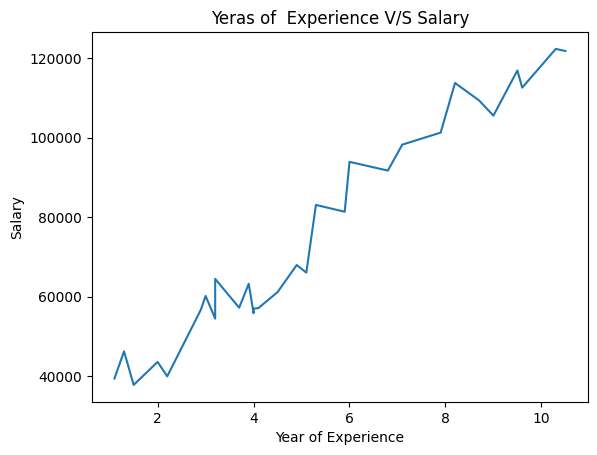

In [9]:
#  watching the trend of salary on Experience
plt.plot(df['YearsExperience'],df['Salary'])
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.title('Yeras of  Experience V/S Salary')

## Model Training

In [10]:
X=df[['YearsExperience']]
Y=df[['Salary']]

In [11]:
# preparing data for taining and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:

# Initializing model
model = LinearRegression()

In [13]:
# train the model
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(x_test)

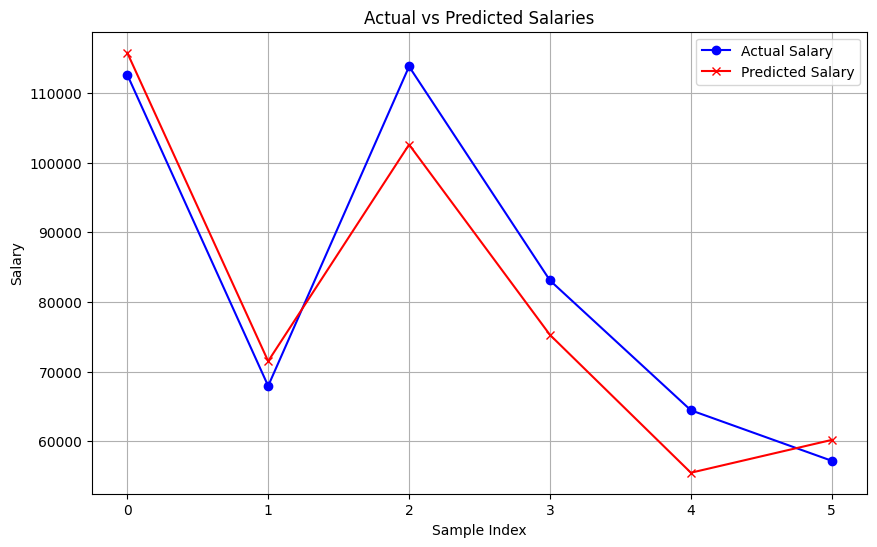

In [15]:

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values, label="Actual Salary", color='blue', marker='o')

# Plot predicted values
plt.plot(y_pred, label="Predicted Salary", color='red', marker='x')

# Labels & Title
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9024461774180497


In [17]:
# https://www.youtube.com/shorts/CRe_O0_W3-8

In [18]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

49830096.85590839


In [19]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6286.453830757749


In [20]:
# new Model Xgboost
xgbs=xgb.XGBRegressor()

In [21]:
xgbs.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
ypred=xgbs.predict(x_test)

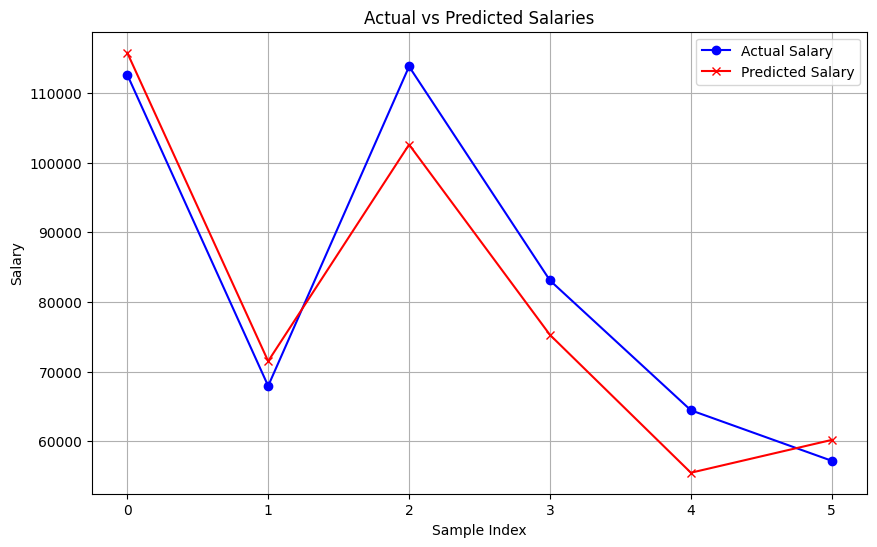

In [23]:

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values, label="Actual Salary", color='blue', marker='o')

# Plot predicted values
plt.plot(y_pred, label="Predicted Salary", color='red', marker='x')

# Labels & Title
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9024461774180497


In [25]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6286.453830757749


In [26]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

49830096.85590839


In [28]:
joblib.dump(model, "model.pkl")

['model.pkl']